In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_original = pd.read_csv('https://drive.usercontent.google.com/download?id=1Yuajd3EGP__4xI03Ps7g52dMTj9lWsGv&export=download&authuser=0&confirm=t&uuid=63f1d990-a055-4e55-87b6-bd4729206140&at=APZUnTXG5E9ymEotve-TI1cGUrcB:1713709571711')

df_original

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
df = df_original.replace('Yes', 1)
df = df.replace('No', 0)
df = df.replace('Female','0')
df = df.replace('Male','1')

df['GenHealth']=df_original['GenHealth'].replace('Poor','0')
df['GenHealth']=df['GenHealth'].replace('Fair','1')
df['GenHealth']=df['GenHealth'].replace('Good','2')
df['GenHealth']=df['GenHealth'].replace('Very good','3')
df['GenHealth']=df['GenHealth'].replace('Excellent','4')

df['AgeCategory'] = df['AgeCategory'].replace('18-24', 21)
df['AgeCategory'] = df['AgeCategory'].replace('25-29', 27)
df['AgeCategory'] = df['AgeCategory'].replace('30-34', 32)
df['AgeCategory'] = df['AgeCategory'].replace('35-39', 37)
df['AgeCategory'] = df['AgeCategory'].replace('40-44', 42)
df['AgeCategory'] = df['AgeCategory'].replace('45-49', 47)
df['AgeCategory'] = df['AgeCategory'].replace('50-54', 52)
df['AgeCategory'] = df['AgeCategory'].replace('55-59', 57)
df['AgeCategory'] = df['AgeCategory'].replace('60-64', 62)
df['AgeCategory'] = df['AgeCategory'].replace('65-69', 67)
df['AgeCategory'] = df['AgeCategory'].replace('70-74', 72)
df['AgeCategory'] = df['AgeCategory'].replace('75-79', 77)
df['AgeCategory'] = df['AgeCategory'].replace('80 or older', 80)



df['Diabetic'] = df['Diabetic'].replace('No, borderline diabetes', 3)
df['Diabetic'] = df['Diabetic'].replace('Yes (during pregnancy)', 4)

X=df.drop(['HeartDisease','Race'], axis=1)
y=df['HeartDisease']

# Phân tích dữ liệu

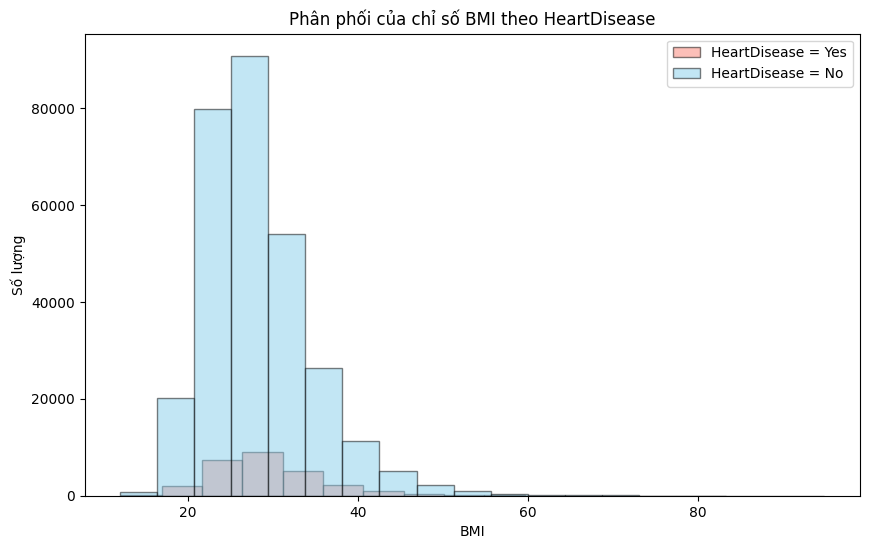

In [4]:
bmi = df_original[['BMI', 'HeartDisease']]
bmi_yes = bmi[bmi['HeartDisease'] == 'Yes']['BMI']
bmi_no = bmi[bmi['HeartDisease'] == 'No']['BMI']

c_yes = int(1 + 3.322 * np.log10(bmi_yes.count()))
c_no = int(1 + 3.322 * np.log10(bmi_no.count()))

plt.figure(figsize=(10, 6))
plt.hist(bmi_yes, bins=c_yes, color='salmon', edgecolor='black', alpha=0.5, label='HeartDisease = Yes')

plt.hist(bmi_no, bins=c_no, color='skyblue', edgecolor='black', alpha=0.5, label='HeartDisease = No')

plt.title('Phân phối của chỉ số BMI theo HeartDisease')
plt.xlabel('BMI')
plt.ylabel('Số lượng')
plt.legend()

In [5]:
thresholds = [0, 18.5, 30, float('inf')] 
labels = ['Thấp', 'Bình thường', 'Béo phì']

bmi_category = bmi.copy()
bmi_category['BMI'] = pd.cut(bmi['BMI'], bins=thresholds, labels=labels, right=False)

print(bmi_category)

                BMI HeartDisease
0              Thấp           No
1       Bình thường           No
2       Bình thường           No
3       Bình thường           No
4       Bình thường           No
...             ...          ...
319790  Bình thường          Yes
319791  Bình thường           No
319792  Bình thường           No
319793      Béo phì           No
319794      Béo phì           No

[319795 rows x 2 columns]


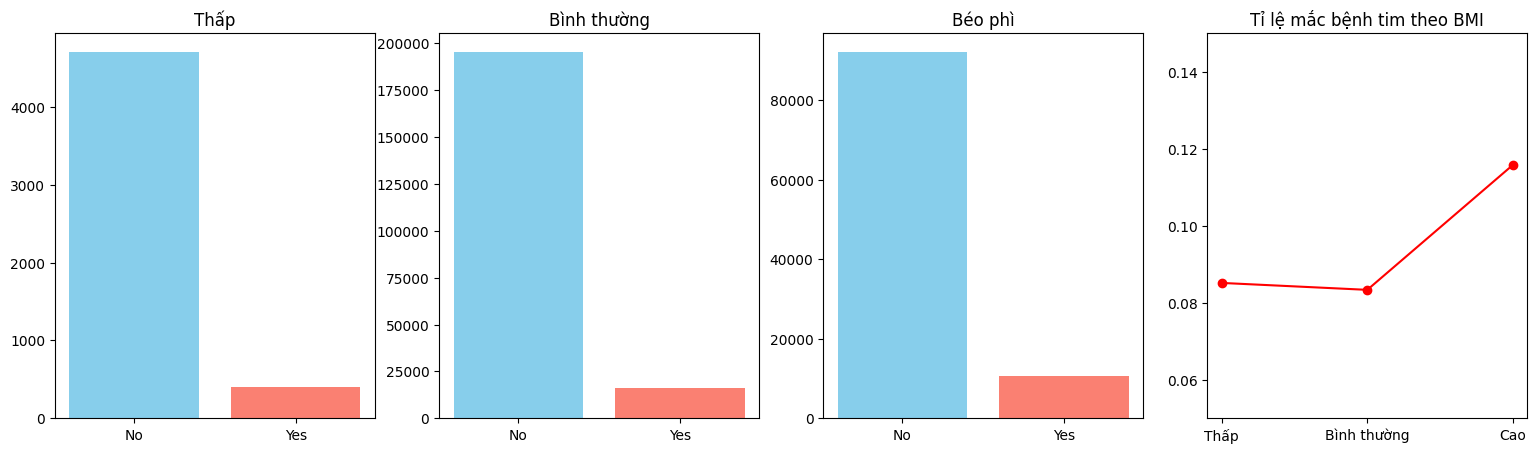

In [6]:
bmi_low = bmi_category[bmi_category['BMI'] == 'Thấp']['HeartDisease']
bmi_medium = bmi_category[bmi_category['BMI']=='Bình thường']['HeartDisease']
bmi_high = bmi_category[bmi_category['BMI']=='Béo phì']['HeartDisease']

counts_low = bmi_low.value_counts()
counts_medium = bmi_medium.value_counts()
counts_high = bmi_high.value_counts()

#print(counts_low)

ratio = [counts_low['Yes']/counts_low['No'], counts_medium['Yes']/counts_medium['No'], counts_high['Yes']/counts_high['No']]
#print(ratio)

# Vẽ biểu đồ cột
fig, axes = plt.subplots(1, 4, figsize=(19, 5))

# Vẽ biểu đồ cột cho từng nhóm BMI
axes[0].bar(['No', 'Yes'], counts_low, color=['skyblue', 'salmon'])
axes[0].set_title('Thấp')


axes[1].bar(['No', 'Yes'], counts_medium, color=['skyblue', 'salmon'])
axes[1].set_title('Bình thường')

axes[2].bar(['No', 'Yes'], counts_high, color=['skyblue', 'salmon'])
axes[2].set_title('Béo phì')

axes[3].plot(['Thấp', 'Bình thường', 'Cao'], ratio, marker='o', linestyle='-', color='red')
axes[3].set_title('Tỉ lệ mắc bệnh tim theo BMI')
axes[3].set_ylim(0.05, 0.15)


plt.show()

Chỉ số BMI (Body Mass Index) hay còn gọi là chỉ số khối cơ thể, chỉ số thể trọng, là một công cụ thường được sử dụng để đo lượng mỡ trong cơ thể.
![BMI](https://www.ncbi.nlm.nih.gov/books/NBK513285/bin/bmi__WHO.jpg)

### Sự ảnh hưởng của độ tuổi đến bệnh tim

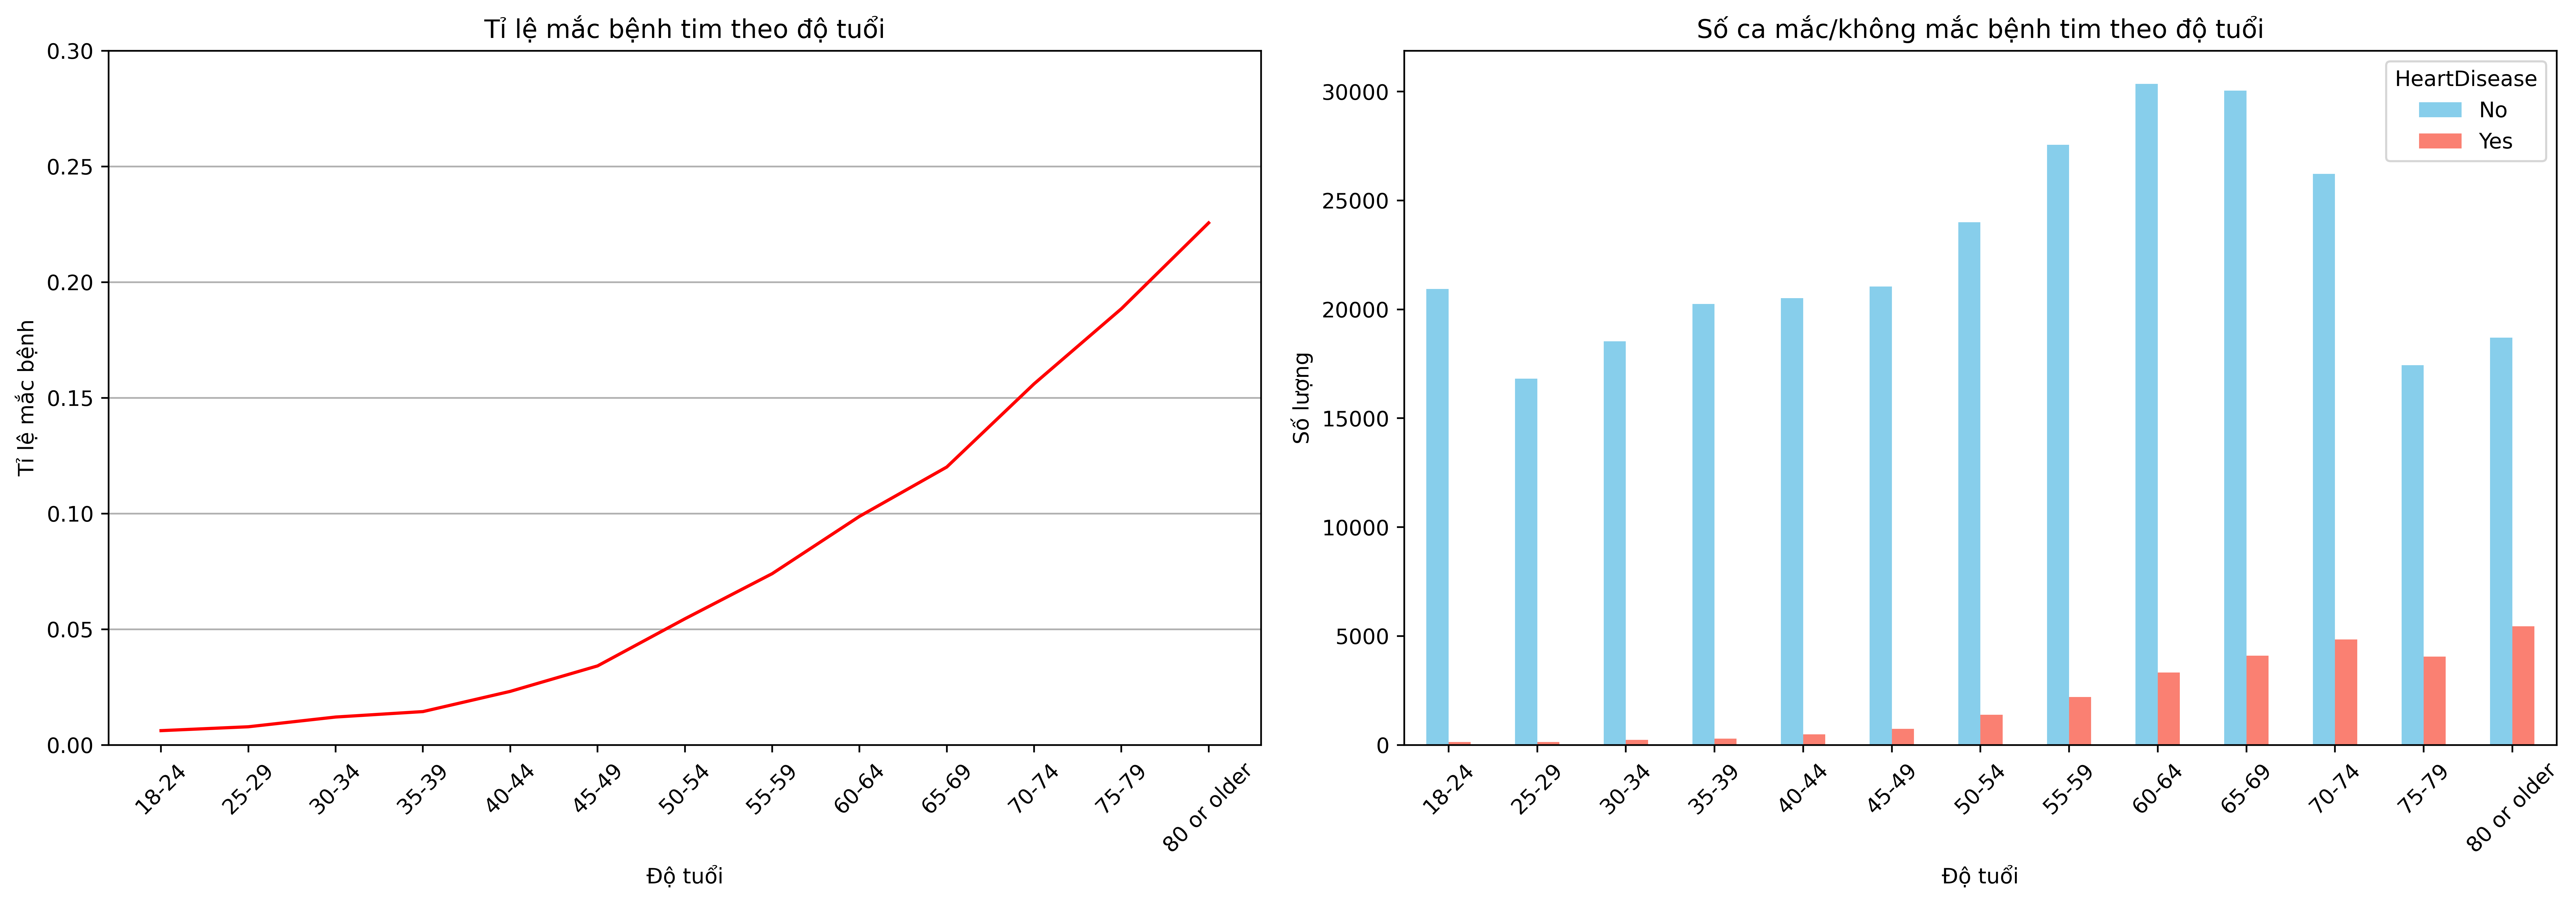

In [7]:
df_grouped = df_original.groupby(['AgeCategory', 'HeartDisease']).size().unstack(fill_value=0)
ratio_by_age = df_grouped['Yes'] / df_grouped.sum(axis=1)

# Tạo các trục x và y
x_axis = np.arange(0, len(df_grouped.index))
ageCategory_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(17, 6), dpi=500)

# Biểu đồ 1: Tỉ lệ mắc bệnh tim theo độ tuổi
ax = axes[0]
ratio_by_age.plot(kind='line', color='red', ax=ax)
ax.set_xticks(x_axis)
ax.set_xticklabels(ageCategory_order, rotation=45)
ax.set_title("Tỉ lệ mắc bệnh tim theo độ tuổi")
ax.set_xlabel("Độ tuổi")
ax.set_ylabel("Tỉ lệ mắc bệnh")
ax.set_ylim(0, 0.3)
ax.grid(axis='y')

# Biểu đồ 2: Số ca mắc/không mắc bệnh tim theo độ tuổi
ax = axes[1]
df_grouped.plot(kind='bar', stacked=False, ax=ax, color =['skyblue', 'salmon'])
ax.set_xticks(x_axis)
ax.set_xticklabels(ageCategory_order, rotation=45)
ax.set_title("Số ca mắc/không mắc bệnh tim theo độ tuổi")
ax.set_xlabel("Độ tuổi")
ax.set_ylabel("Số lượng")
ax.legend(title='HeartDisease', loc='upper right')
plt.tight_layout()
plt.show()

### Sự ảnh hưởng của Sức khỏe tâm lý, vật lý đến bệnh tim

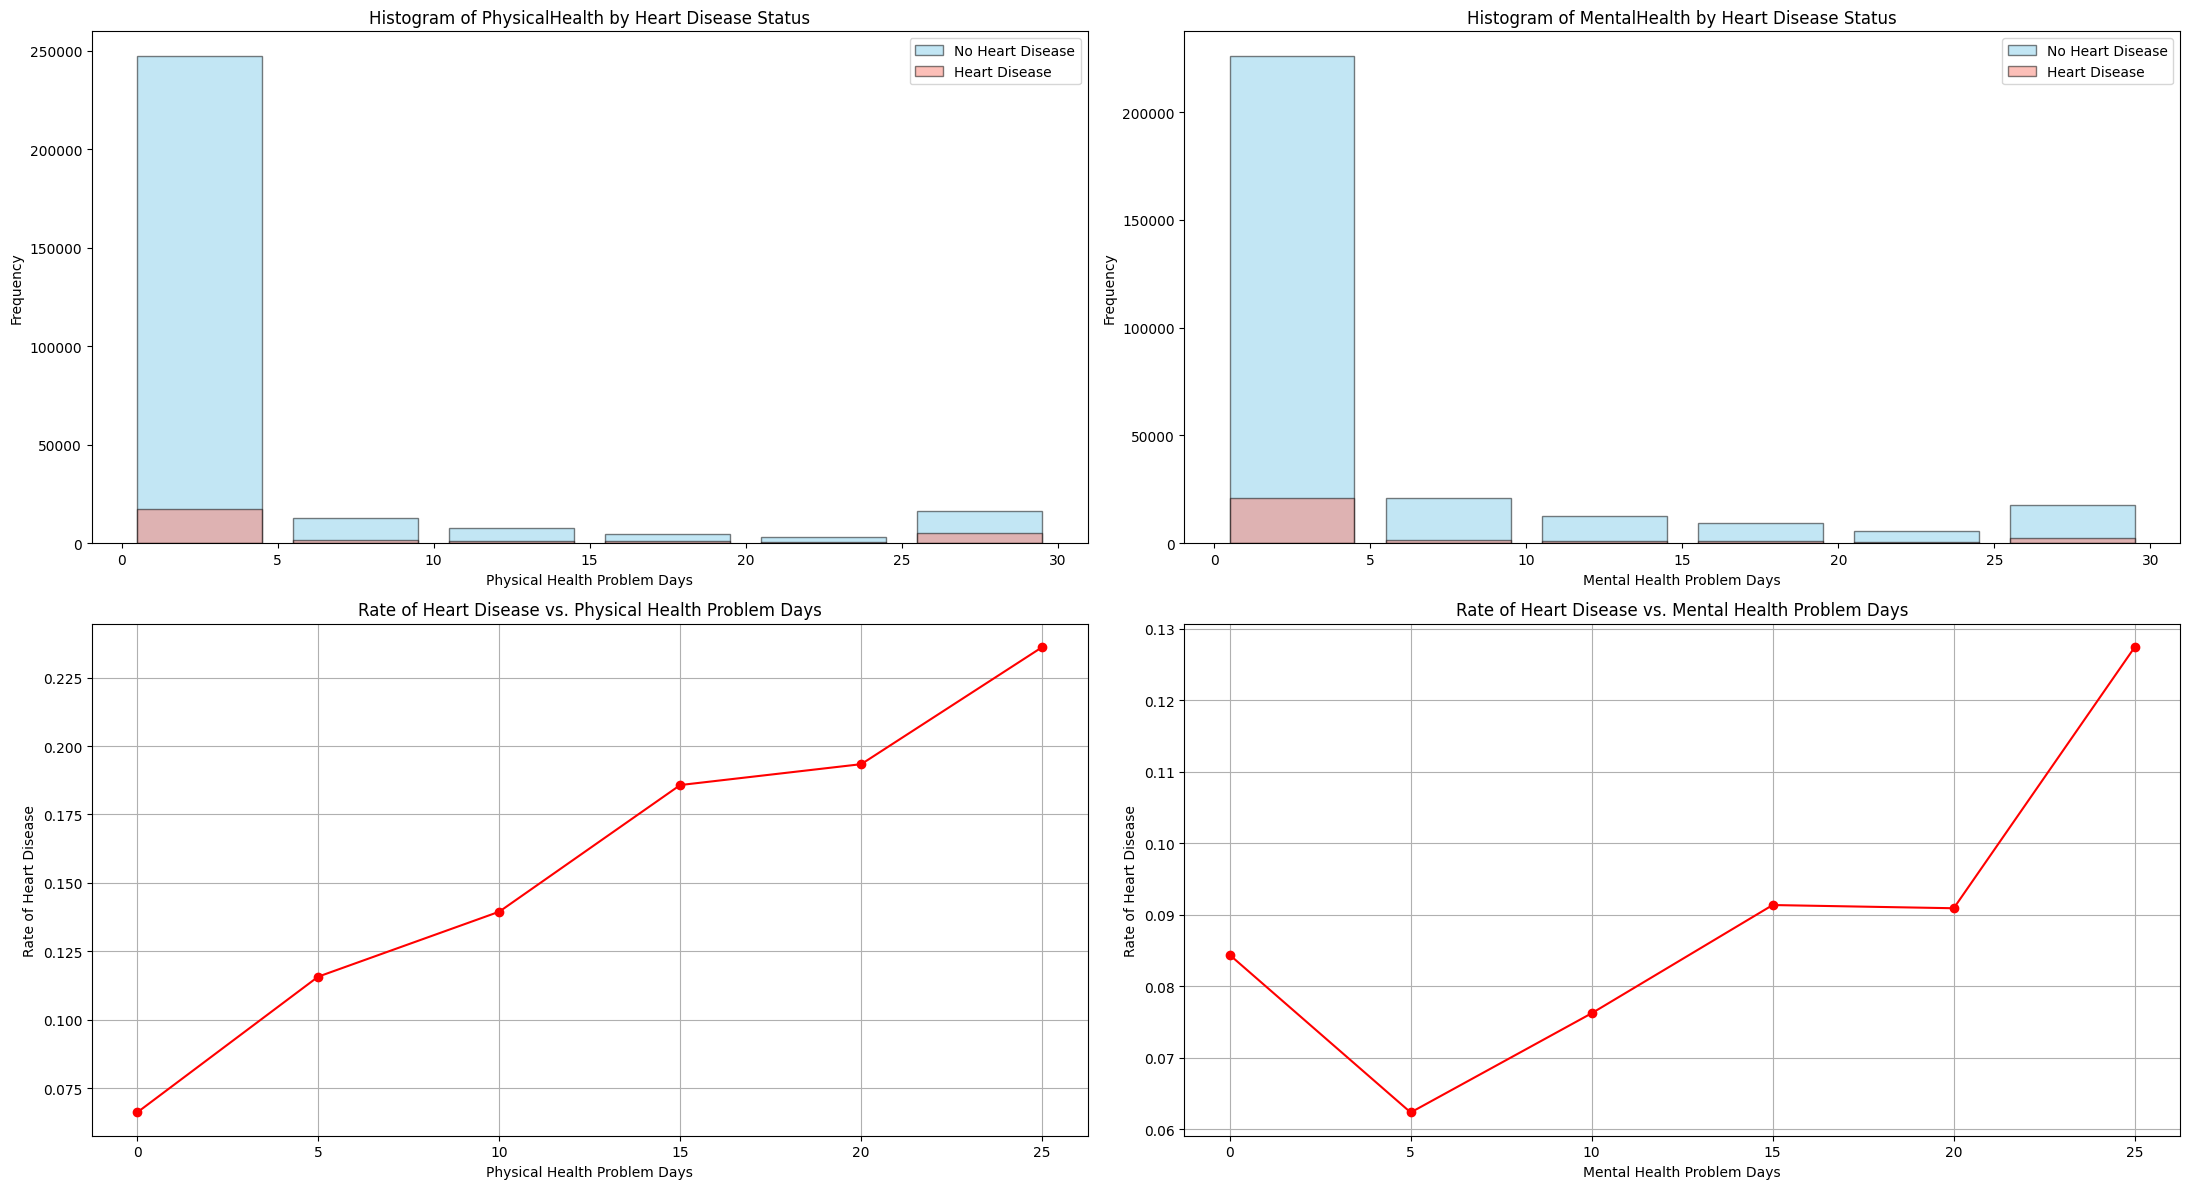

In [8]:
# Assuming df_orginal is already defined and has the necessary columns

# Filter data by HeartDisease for Physical Health
df_ph_no = df_original[df_original['HeartDisease'] == 'No']['PhysicalHealth']
df_ph_yes = df_original[df_original['HeartDisease'] == 'Yes']['PhysicalHealth']

# Filter data by HeartDisease for Mental Health
df_mh_no = df_original[df_original['HeartDisease'] == 'No']['MentalHealth']
df_mh_yes = df_original[df_original['HeartDisease'] == 'Yes']['MentalHealth']

# Define bins for intervals
bins = [0, 5, 10, 15, 20, 25, 30]

plt.figure(figsize=(22, 12))

# Plotting Histogram for Physical Health
ax1 = plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first subplot
ax1.hist(df_ph_no, bins=bins, alpha=0.5, label='No Heart Disease', color='skyblue', edgecolor='black', rwidth=0.8)
ax1.hist(df_ph_yes, bins=bins, alpha=0.5, label='Heart Disease', color='salmon', edgecolor='black', rwidth=0.8)
ax1.set_title('Histogram of PhysicalHealth by Heart Disease Status')
ax1.set_xlabel('Physical Health Problem Days')
ax1.set_ylabel('Frequency')
ax1.legend()

# Plotting Histogram for Mental Health
ax2 = plt.subplot(2, 2, 2)
ax2.hist(df_mh_no, bins=bins, alpha=0.5, label='No Heart Disease', color='skyblue', edgecolor='black', rwidth=0.8)
ax2.hist(df_mh_yes, bins=bins, alpha=0.5, label='Heart Disease', color='salmon', edgecolor='black', rwidth=0.8)
ax2.set_title('Histogram of MentalHealth by Heart Disease Status')
ax2.set_xlabel('Mental Health Problem Days')
ax2.set_ylabel('Frequency')
ax2.legend()

# Calculate and plot rates for Physical Health
counts_ph_no, _ = np.histogram(df_ph_no, bins)
counts_ph_yes, _ = np.histogram(df_ph_yes, bins)
rates_ph = np.where(counts_ph_no + counts_ph_yes == 0, np.nan, counts_ph_yes / (counts_ph_no + counts_ph_yes))

ax3 = plt.subplot(2, 2, 3)
ax3.plot(bins[:-1], rates_ph, marker='o', linestyle='-', color='red')
ax3.set_title('Rate of Heart Disease vs. Physical Health Problem Days')
ax3.set_xlabel('Physical Health Problem Days')
ax3.set_ylabel('Rate of Heart Disease')
ax3.grid(True)

# Calculate and plot rates for Mental Health
counts_mh_no, _ = np.histogram(df_mh_no, bins)
counts_mh_yes, _ = np.histogram(df_mh_yes, bins)
rates_mh = np.where(counts_mh_no + counts_mh_yes == 0, np.nan, counts_mh_yes / (counts_mh_no + counts_mh_yes))

ax4 = plt.subplot(2, 2, 4)
ax4.plot(bins[:-1], rates_mh, marker='o', linestyle='-', color='red')
ax4.set_title('Rate of Heart Disease vs. Mental Health Problem Days')
ax4.set_xlabel('Mental Health Problem Days')
ax4.set_ylabel('Rate of Heart Disease')
ax4.grid(True)

plt.tight_layout()
plt.show()

### Sự ảnh hưởng của việc hút thuốc lá đối với bệnh tim theo độ tuổi

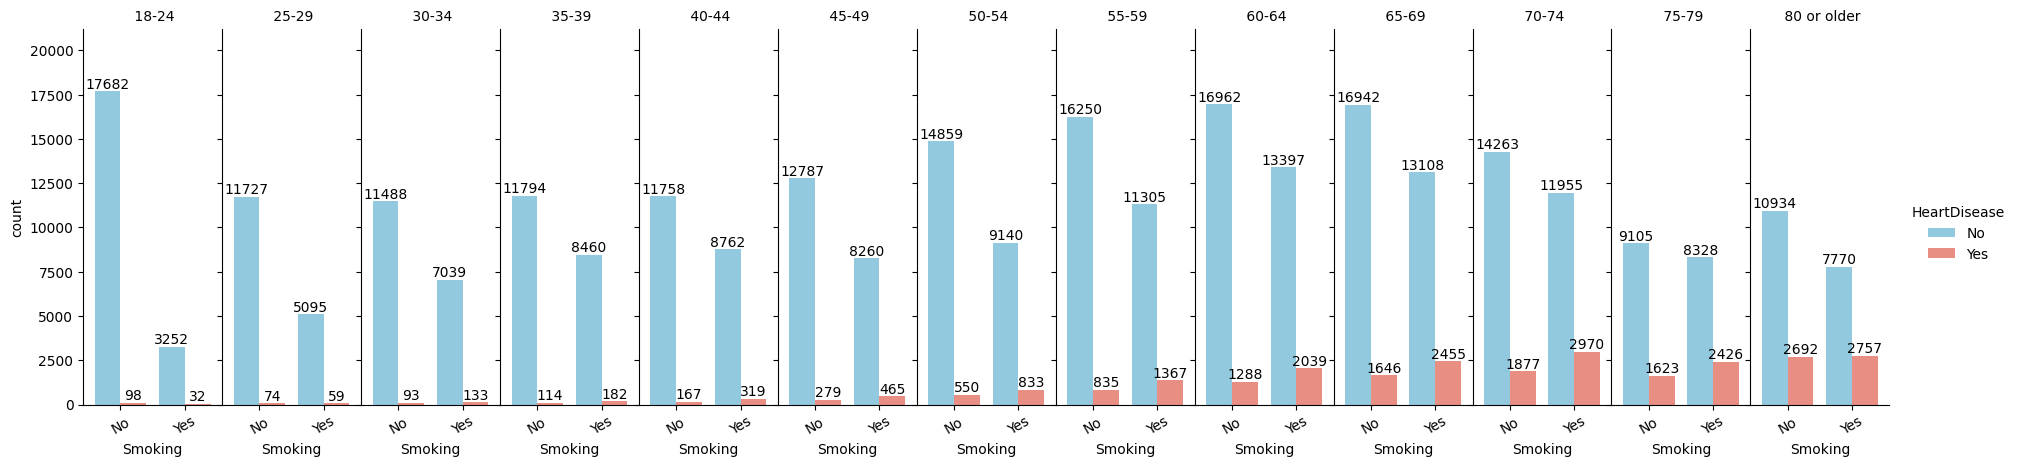

In [9]:
df_sorted=df_original.sort_values('AgeCategory')

g=sns.catplot(x='Smoking' , hue="HeartDisease", col="AgeCategory",data=df_sorted,
                kind="count", height=5, aspect=.3, palette = {'No': 'skyblue', 'Yes': 'salmon'})
    

for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=False)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.1) # slightly more margin as a separation
    ax.tick_params(axis='x', labelrotation=30)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)   

    #title for each     
g.set_titles( col_template=' {col_name}')
    
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

#Remove lable form below of each 
g.set_xlabels()

### Sự ảnh hưởng của việc uống rượu bia đối với bệnh tim theo độ tuổi

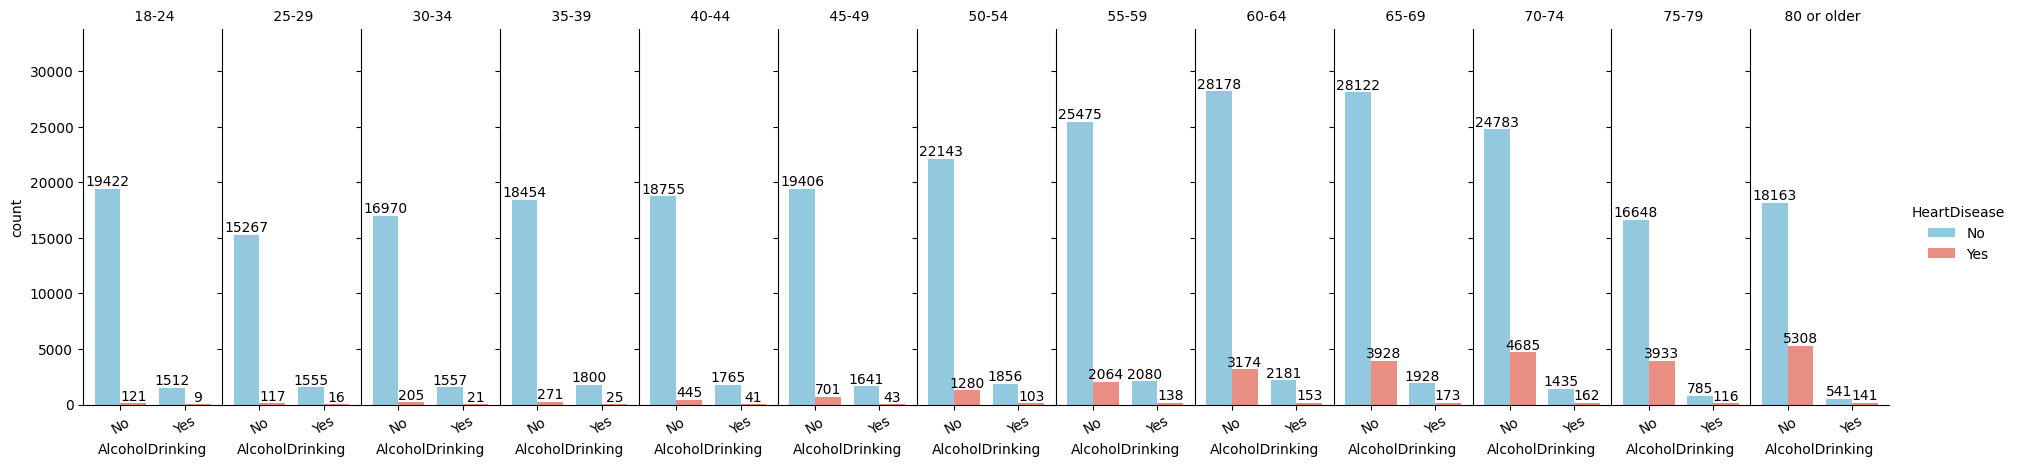

In [10]:
df_sorted=df_original.sort_values('AgeCategory')

g=sns.catplot(x='AlcoholDrinking' , hue="HeartDisease", col="AgeCategory",data=df_sorted,
                kind="count", height=5, aspect=.3, palette = {'No': 'skyblue', 'Yes': 'salmon'})
    

for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=False)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.1) # slightly more margin as a separation
    ax.tick_params(axis='x', labelrotation=30)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)   

    #title for each     
g.set_titles( col_template=' {col_name}')
    
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

#Remove lable form below of each 
g.set_xlabels()

### Sự ảnh hưởng của đột quỵ đối với bệnh tim theo độ tuổi

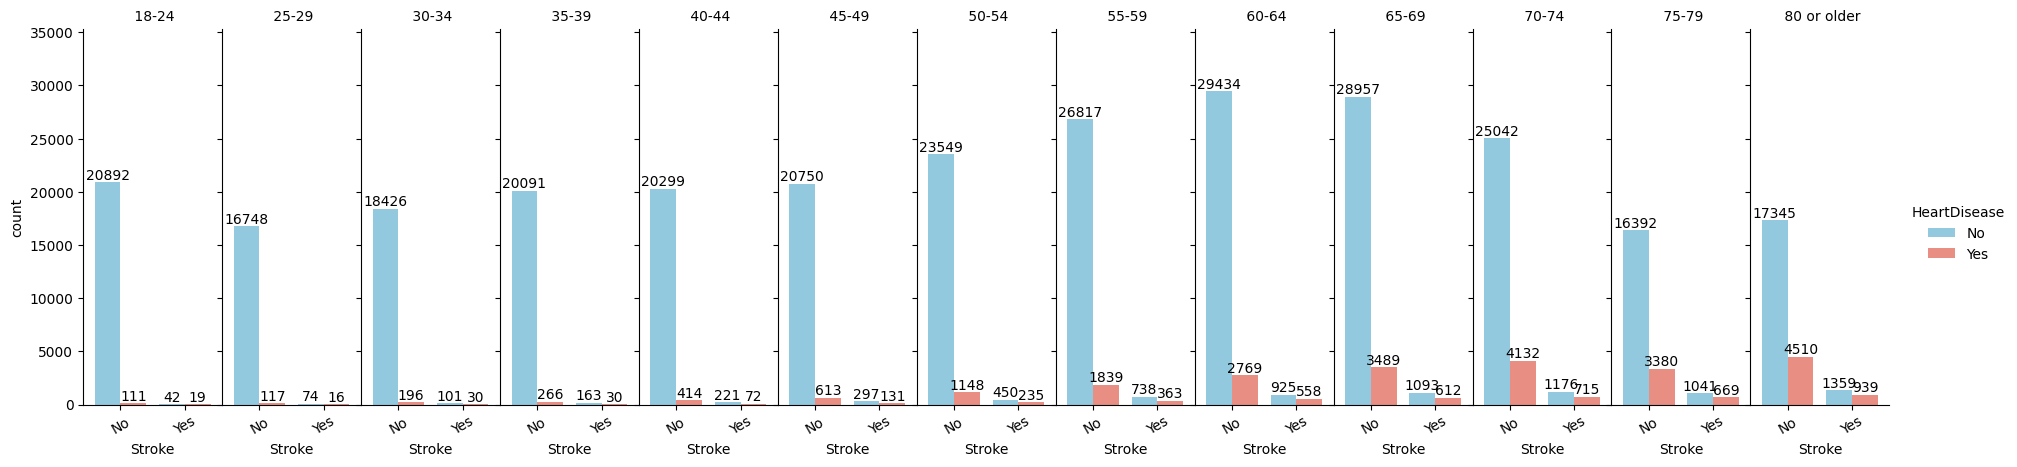

In [11]:
df_sorted=df_original.sort_values('AgeCategory')

g=sns.catplot(x='Stroke' , hue="HeartDisease", col="AgeCategory",data=df_sorted,
                kind="count", height=5, aspect=.3, palette = {'No': 'skyblue', 'Yes': 'salmon'})
    

for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=False)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.1) # slightly more margin as a separation
    ax.tick_params(axis='x', labelrotation=30)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)   

    #title for each     
g.set_titles( col_template=' {col_name}')
    
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

#Remove lable form below of each 
g.set_xlabels()

### Sự ảnh hưởng của việc khó khăn khi đi lại đối với bệnh tim theo độ tuổi

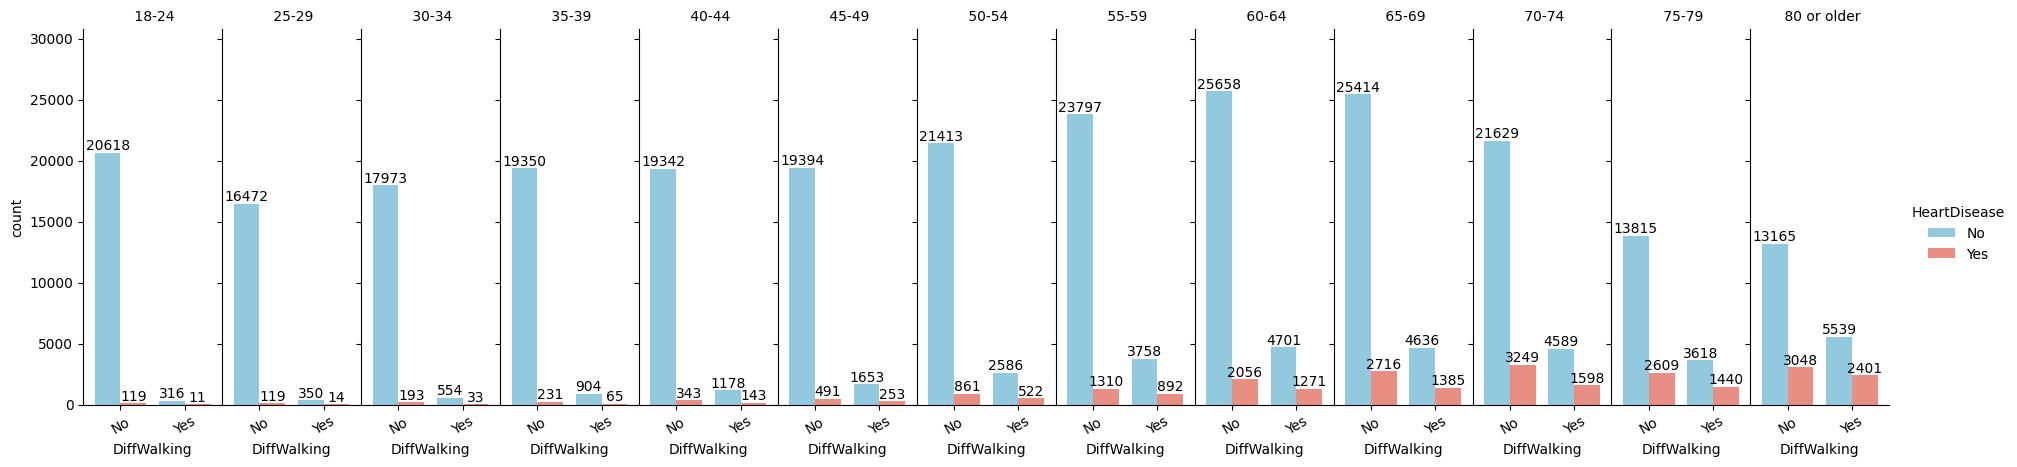

In [12]:
df_sorted=df_original.sort_values('AgeCategory')

g=sns.catplot(x='DiffWalking' , hue="HeartDisease", col="AgeCategory",data=df_sorted,
                kind="count", height=5, aspect=.3, palette = {'No': 'skyblue', 'Yes': 'salmon'})
    

for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=False)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.1) # slightly more margin as a separation
    ax.tick_params(axis='x', labelrotation=30)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)   

    #title for each     
g.set_titles( col_template=' {col_name}')
    
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

#Remove lable form below of each 
g.set_xlabels()

### Sự ảnh hưởng của việc khó vận động đối với bệnh tim theo độ tuổi

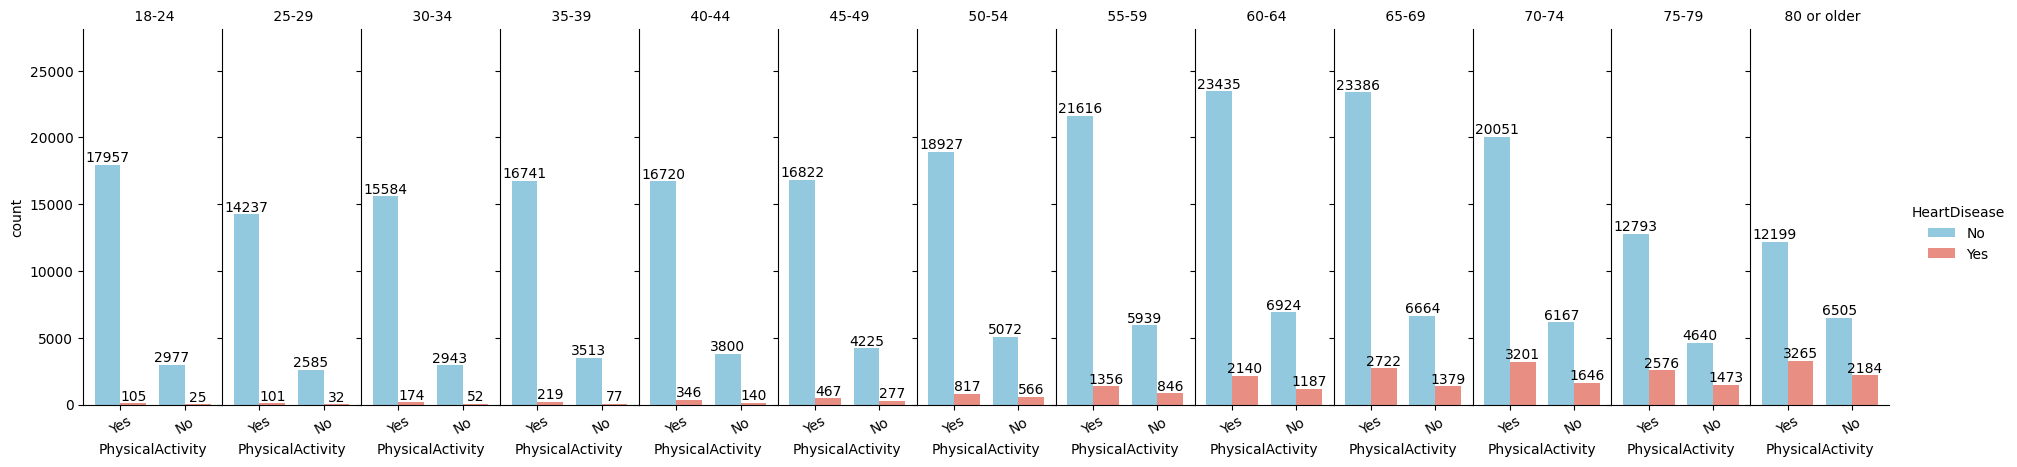

In [13]:
df_sorted=df_original.sort_values('AgeCategory')

g=sns.catplot(x='PhysicalActivity' , hue="HeartDisease", col="AgeCategory",data=df_sorted,
                kind="count", height=5, aspect=.3, palette = {'No': 'skyblue', 'Yes': 'salmon'})
    

for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=False)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.1) # slightly more margin as a separation
    ax.tick_params(axis='x', labelrotation=30)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)   

    #title for each     
g.set_titles( col_template=' {col_name}')
    
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

#Remove lable form below of each 
g.set_xlabels()

### Sự ảnh hưởng của bệnh hen suyễn đối với bệnh tim theo độ tuổi

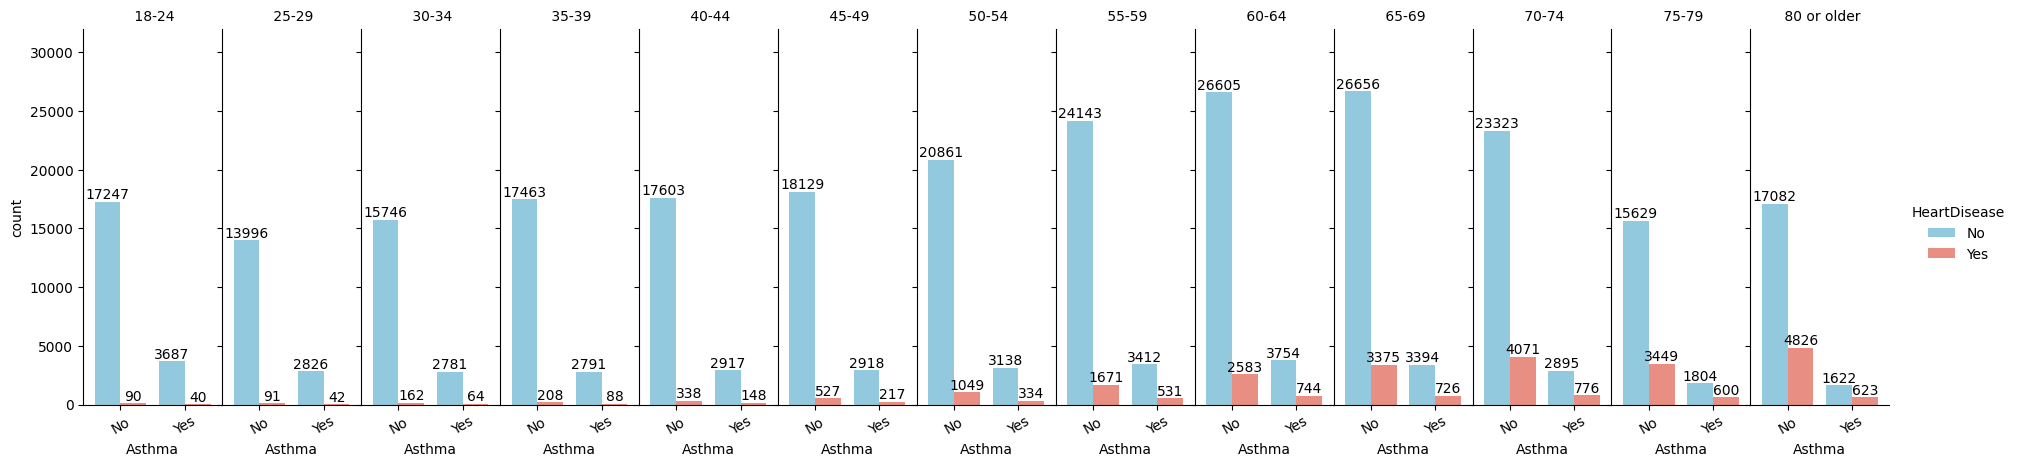

In [14]:
df_sorted=df_original.sort_values('AgeCategory')

g=sns.catplot(x='Asthma' , hue="HeartDisease", col="AgeCategory",data=df_sorted,
                kind="count", height=5, aspect=.3, palette = {'No': 'skyblue', 'Yes': 'salmon'})
    

for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=False)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.1) # slightly more margin as a separation
    ax.tick_params(axis='x', labelrotation=30)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)   

    #title for each     
g.set_titles( col_template=' {col_name}')
    
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

#Remove lable form below of each 
g.set_xlabels()

### Sự ảnh hưởng của bệnh suy thận đối với bệnh tim theo độ tuổi

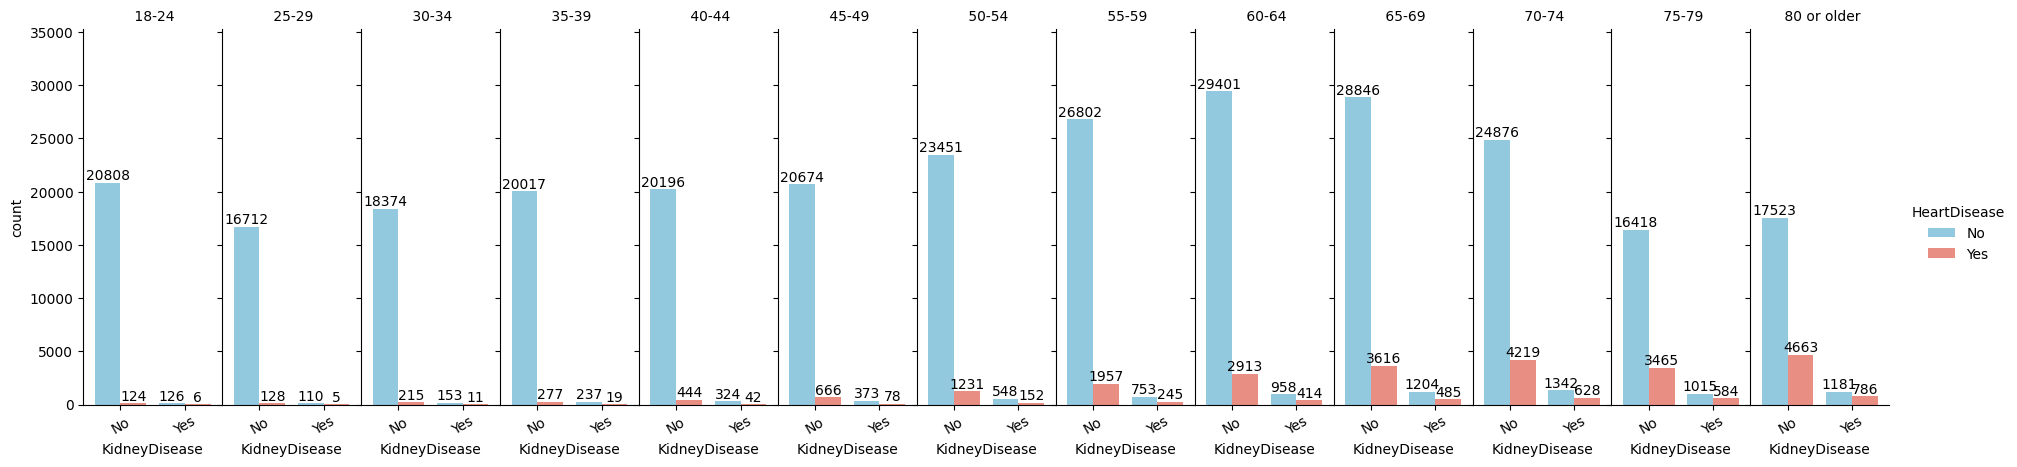

In [15]:
df_sorted=df_original.sort_values('AgeCategory')

g=sns.catplot(x='KidneyDisease' , hue="HeartDisease", col="AgeCategory",data=df_sorted,
                kind="count", height=5, aspect=.3, palette = {'No': 'skyblue', 'Yes': 'salmon'})
    

for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=False)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.1) # slightly more margin as a separation
    ax.tick_params(axis='x', labelrotation=30)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)   

    #title for each     
g.set_titles( col_template=' {col_name}')
    
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

#Remove lable form below of each 
g.set_xlabels()

### Sự ảnh hưởng của bệnh ung thư da đối với bệnh tim theo độ tuổi

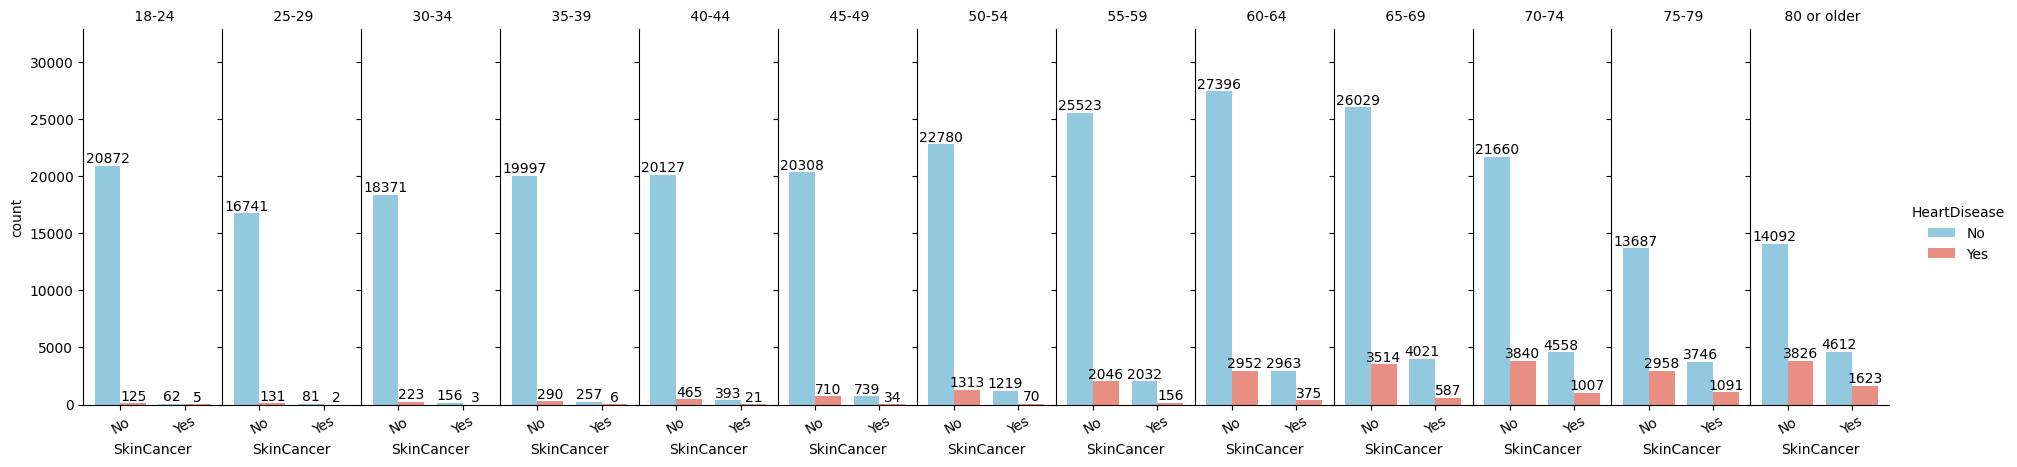

In [16]:
df_sorted=df_original.sort_values('AgeCategory')

g=sns.catplot(x='SkinCancer' , hue="HeartDisease", col="AgeCategory",data=df_sorted,
                kind="count", height=5, aspect=.3, palette = {'No': 'skyblue', 'Yes': 'salmon'})
    

for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=False)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.1) # slightly more margin as a separation
    ax.tick_params(axis='x', labelrotation=30)
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)   

    #title for each     
g.set_titles( col_template=' {col_name}')
    
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

#Remove lable form below of each 
g.set_xlabels()

# Giả thuyết về tỉ lệ mắc bệnh tim ở người trẻ tuổi

Quan sát tập dữ liệu, chúng em nhận thấy không có sự khác biệt về tỉ lệ mắc bệnh tim giữa nhóm có bệnh và nhóm không có bệnh ở người trẻ tuổi. 
### Giả thuyết null của nhóm đặt ra là 
*"Không có sự khác biệt về tỉ lệ mắc bệnh tim giữa nhóm có bệnh và nhóm không có bệnh ở người trẻ tuổi."*
Việc kiểm định giả thuyết này sẽ giúp hiểu rõ hơn về mối liên hệ giữa bệnh lý và tuổi tác trong nguy cơ mắc bệnh tim, đồng thời đóng góp vào việc cải thiện chăm sóc sức khỏe cho người trẻ tuổi.


Việc kiểm định giả thuyết này không chỉ là một phần quan trọng của quy trình nghiên cứu mà còn mang lại những thông tin quý giá về mối liên hệ giữa bệnh lý và độ tuổi. Kết quả từ việc kiểm định này có thể giúp chúng ta hiểu rõ hơn về cơ chế phát triển bệnh tim ở các nhóm tuổi khác nhau và từ đó, phát triển các biện pháp phòng tránh và chăm sóc sức khỏe phù hợp, đặc biệt là đối với người trẻ tuổi - một nhóm dân số có ý nghĩa đặc biệt trong việc xây dựng một cộng đồng khỏe mạnh.


### Chia dữ liệu

In [17]:
df_test = df[(df['AgeCategory'] < 30)]
#print(df_test)
H0 = "Không có sự khác biệt về tỉ lệ mắc bệnh tim giữa nhóm có bệnh và nhóm không có bệnh ở người trẻ tuổi."
H1 = "Có sự khác biệt đáng kể về tỉ lệ mắc bệnh tim giữa nhóm có bệnh và nhóm không có bệnh ở người trẻ tuổi."
'''
    p_n: tỉ lệ người trẻ tuổi mắc bệnh tim giữa nhóm không có bệnh
    p_a: tỉ lệ người trẻ tuổi mắc bệnh tim giữa nhóm có bệnh
    
    Giả định H0:
            p_a - p_n < 0.1
    Giả định H1:
            p_a - p_n >= 0.1
'''
df_test = df_test.drop(['Sex', 'AgeCategory', 'SleepTime', 'PhysicalHealth', 'MentalHealth', 'GenHealth'], axis=1)
print(df_test)
def count_conditions(row):
        count = 0
        if row['BMI'] <= 30:
            count += 1
        if row['Smoking'] == 0:
            count += 1
        if row['AlcoholDrinking'] == 0:
            count += 1
        if row['Stroke'] == 0:
            count += 1
        if row['DiffWalking'] == 0:
            count += 1
        if row['Diabetic'] == 0:
            count += 1
        if row['PhysicalActivity'] == 0:
            count += 1
        if row['Asthma'] == 0:
            count += 1
        if row['KidneyDisease'] == 0:
            count += 1
        if row['SkinCancer'] == 0:
            count += 1
        return count
        
threshold = 9
# đại diện cho số thuộc tính/ sức khỏe ở mức tốt tối thiểu 
df_test['count'] = df_test.apply(count_conditions, axis=1)
df_test_normal = df_test[df_test['count'] > threshold]
df_test_abnormal = df_test[df_test['count'] <= threshold]

    
print(df_test_normal)
print(df_test_abnormal)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  DiffWalking  \
112                0  26.25        0                0       0            0   
336                0  21.40        1                0       0            1   
422                0  25.85        0                0       0            0   
436                0  20.92        1                1       0            0   
501                0  27.50        0                0       0            0   
...              ...    ...      ...              ...     ...          ...   
319773             0  26.45        0                0       0            0   
319778             0  26.63        0                0       0            0   
319780             0  30.67        0                0       0            0   
319789             0  22.22        0                0       0            0   
319793             0  32.81        0                0       0            0   

            Race  Diabetic  PhysicalActivity  Asthma  KidneyDis

from statsmodels.stats.proportion import proportions_ztest


n_normal = len(df_test_normal)
n_abnormal = len(df_test_abnormal)

disease_normal = (df_test_normal['HeartDisease'] == 1).sum()
disease_abnormal = (df_test_abnormal['HeartDisease'] == 1).sum()

ratio_normal = disease_normal/n_normal
ratio_abnormal = disease_abnormal/ n_abnormal

#print(ratio_normal)
#print(ratio_abnormal)
count = [disease_normal, disease_abnormal]
nobs = [n_normal, n_abnormal]

z_statistic, p_value = proportions_ztest(count, nobs, alternative = "two-sided")


# In kết quả
print("Z-statistic:", z_statistic)
print("P-value:", p_value)

# Kiểm tra có thể từ chối giả thuyết null hay không
alpha = 0.05
if p_value < alpha:
    print(f"Chấp nhận giả thuyết: {H1}")
else:
    print(f"Giả thuyết ban đầu: {H0} là đúng")

# Kết luận về giả thuyết
“Không có sự khác biệt về tỉ lệ mắc bệnh tim giữa nhóm có bệnh và nhóm không có bệnh ở người trẻ tuổi" là đúng. Kết quả này chỉ ra rằng, trong bối cảnh của nghiên cứu này, không có bằng chứng đủ để cho thấy sức khỏe tổng thể và các yếu tố rủi ro khác ảnh hưởng đáng kể đến tỉ lệ mắc bệnh tim trong nhóm người trẻ tuổi.
Giả thuyết này đã mang lại một cái nhìn mới về dữ liệu, từ đó có thể mở rộng phạm vi nghiên cứu bằng cách xem xét thêm các nguy cơ như: yếu tố di truyền, môi trường,…

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build Model

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [20]:

class ModelLogisticRegression:
    def __init__(self, X_train, y_train, X_valid, y_valid, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_valid = X_valid
        self.y_valid = y_valid
        self.X_test = X_test
        self.y_test = y_test
        
    def train_model(self):
        self.model = LogisticRegression(max_iter=1000, random_state=42)
        self.model.fit(self.X_train, self.y_train)
    def evaluate_model(self, threshold, is_test=False):
        
        if is_test == True:
            # Đánh giá mô hình trên tập kiểm tra
            y_test_proba = self.model.predict_proba(self.X_test)
            y_test_pred = (y_test_proba[:,1] >= threshold).astype(int)
            accuracy_test = accuracy_score(self.y_test, y_test_pred)
            
            print("Độ chính xác trên tập test:", accuracy_test)
            return y_test_pred
        
        # Đánh giá mô hình trên tập validation
        y_valid_proba = self.model.predict_proba(self.X_valid)
        self.threshold = threshold
        y_valid_pred = (y_valid_proba[:,1] >= threshold).astype(int)
        #print(y_valid_pred)
        accuracy_valid = accuracy_score(self.y_valid, y_valid_pred)
        
        print("Độ chính xác trên tập validation:", accuracy_valid)
        
        # Đánh giá metrics với ngưỡng
        print(f"Đánh giá metrics với ngưỡng {threshold}:") 
        print("Accuracy:", accuracy_score(self.y_valid, y_valid_pred)) 
        print("Precision:", precision_score(self.y_valid, y_valid_pred)) 
        print("Recall:", recall_score(self.y_valid, y_valid_pred)) 
        print("F1 score:", f1_score(self.y_valid, y_valid_pred))
        return y_valid_pred
    
    
my_lr = ModelLogisticRegression(X_train, y_train, X_valid, y_valid, X_test, y_test)

my_lr.train_model()
y_valid_pred_lr = my_lr.evaluate_model(0.5)

accuracy = accuracy_score(y_valid, y_valid_pred_lr)
precision = precision_score(y_valid, y_valid_pred_lr)
recall = recall_score(y_valid, y_valid_pred_lr)
f1 = f1_score(y_valid, y_valid_pred_lr)

# Lưu giá trị vào mảng
metrics_lr = [accuracy, precision, recall, f1]


Độ chính xác trên tập validation: 0.914986762283975
Đánh giá metrics với ngưỡng 0.5:
Accuracy: 0.914986762283975
Precision: 0.5246338215712384
Recall: 0.09574726609963548
F1 score: 0.16193999177969587


In [21]:

class ModelGradientBoosting:
    def __init__(self, X_train, y_train, X_valid, y_valid, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_valid = X_valid
        self.y_valid = y_valid
        self.X_test = X_test
        self.y_test = y_test
    
    def train_model(self):
        self.model = GradientBoostingClassifier(random_state=42)
        self.model.fit(self.X_train, self.y_train)
        
    def evaluate_model(self, threshold,is_test=False):
        
        if is_test == True:
            # Đánh giá mô hình trên tập kiểm tra
            y_test_proba = self.model.predict_proba(self.X_test)
            
            y_test_pred = (y_test_proba[:,1] >= threshold).astype(int)
            accuracy_test = accuracy_score(self.y_test, y_test_pred)
        
            print("Độ chính xác trên tập test:", accuracy_test)
            return y_test_pred
        
        
        # Đánh giá mô hình trên tập validation
        y_valid_proba = self.model.predict_proba(self.X_valid)
        y_valid_pred = (y_valid_proba[:,1] >= threshold).astype(int)
        #print(y_valid_pred)
        accuracy_valid = accuracy_score(self.y_valid, y_valid_pred)
        print("Độ chính xác trên tập validation:", accuracy_valid)
        
        # Đánh giá metrics với ngưỡng
        print(f"Đánh giá metrics với ngưỡng {threshold}:") 
        print("Accuracy:", accuracy_score(self.y_valid, y_valid_pred)) 
        print("Precision:", precision_score(self.y_valid, y_valid_pred)) 
        print("Recall:", recall_score(self.y_valid, y_valid_pred)) 
        print("F1 score:", f1_score(self.y_valid, y_valid_pred))
        return y_valid_pred
        
        
my_gb = ModelGradientBoosting(X_train, y_train, X_valid, y_valid, X_test, y_test)

my_gb.train_model()
y_valid_pred_gb = my_gb.evaluate_model(0.5)
        
        
accuracy = accuracy_score(y_valid, y_valid_pred_gb)
precision = precision_score(y_valid, y_valid_pred_gb)
recall = recall_score(y_valid, y_valid_pred_gb)
f1 = f1_score(y_valid, y_valid_pred_gb)

# Lưu giá trị vào mảng
metrics_gb = [accuracy, precision, recall, f1]



Độ chính xác trên tập validation: 0.9154245450186579
Đánh giá metrics với ngưỡng 0.5:
Accuracy: 0.9154245450186579
Precision: 0.5463258785942492
Recall: 0.08311057108140947
F1 score: 0.14427336005062222


In [22]:

class ModelNeuralNetwork:
    def __init__(self, X_train, y_train, X_valid, y_valid, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_valid = X_valid
        self.y_valid = y_valid
        self.X_test = X_test
        self.y_test = y_test
    
    def build_model(self):
        tf.random.set_seed(42)
        self.model = Sequential([
            Dense(32, activation='relu', input_shape=(self.X_train.shape[1],)),
            Dense(16, activation='relu'),
            #Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    def train_model(self, n_epoch):
        self.model.fit(self.X_train, self.y_train, epochs=n_epoch, validation_data=(self.X_valid, self.y_valid), verbose=2, batch_size=128)
    def evaluate_model(self, threshold, is_test=False):
        
        if is_test == True:
            accuracy_test_nn = self.model.evaluate(self.X_test, self.y_test)[1]
            y_test_nn_pro = self.model.predict(self.X_test)
            self.threshold = threshold
            y_test_pred_nn = (y_test_nn_pro >= threshold).astype(int)
            print("Độ chính xác trên tập test:", accuracy_test_nn)
            return y_test_pred_nn
            
            
        
        
        
        accuracy_valid_nn = self.model.evaluate(self.X_valid, self.y_valid)[1]
        
        y_valid_nn_pro = self.model.predict(self.X_valid)
        self.threshold = threshold
        y_valid_pred_nn = (y_valid_nn_pro >= threshold).astype(int)
        
        print("Độ chính xác trên tập validation:", accuracy_valid_nn)
        
        #print(classification_report(y_valid, y_valid_pred_nn))
        
    
        print(f"Đánh giá metrics với ngưỡng {threshold}:") 
        print("Accuracy:", accuracy_score(self.y_valid, y_valid_pred_nn)) 
        print("Precision:", precision_score(self.y_valid, y_valid_pred_nn)) 
        print("Recall:", recall_score(self.y_valid, y_valid_pred_nn)) 
        print("F1 score:", f1_score(self.y_valid, y_valid_pred_nn))
        
        return y_valid_pred_nn
    
    
my_nn = ModelNeuralNetwork(X_train, y_train, X_valid, y_valid, X_test, y_test)
my_nn.build_model()
my_nn.train_model(5)

y_valid_pred_nn = my_nn.evaluate_model(0.5)

accuracy = accuracy_score(y_valid, y_valid_pred_nn)
precision = precision_score(y_valid, y_valid_pred_nn)
recall = recall_score(y_valid, y_valid_pred_nn)
f1 = f1_score(y_valid, y_valid_pred_nn)

# Lưu giá trị vào mảng
metrics_nn = [accuracy, precision, recall, f1]


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1749/1749 - 3s - 2ms/step - accuracy: 0.9119 - loss: 0.2544 - val_accuracy: 0.9145 - val_loss: 0.2365
Epoch 2/5
1749/1749 - 2s - 1ms/step - accuracy: 0.9151 - loss: 0.2347 - val_accuracy: 0.9148 - val_loss: 0.2345
Epoch 3/5
1749/1749 - 1s - 830us/step - accuracy: 0.9154 - loss: 0.2329 - val_accuracy: 0.9151 - val_loss: 0.2332
Epoch 4/5
1749/1749 - 2s - 998us/step - accuracy: 0.9156 - loss: 0.2315 - val_accuracy: 0.9149 - val_loss: 0.2325
Epoch 5/5
1749/1749 - 2s - 938us/step - accuracy: 0.9157 - loss: 0.2305 - val_accuracy: 0.9149 - val_loss: 0.2321
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.9146 - loss: 0.2354
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step
Độ chính xác trên tập validation: 0.9149034023284912
Đánh giá metrics với ngưỡng 0.5:
Accuracy: 0.9149033750964164
Precision: 0.5209656925031766
Recall: 0.09963547995139732
F1 score: 0.16727866177070583


In [23]:
from prettytable import PrettyTable

# Tạo bảng
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
models = ["Logistic Regression", "Gradient Boosting", "Neural Network"]

metrics_lr_formatted = ["{:.2f}".format(metric) for metric in metrics_lr]
metrics_gb_formatted = ["{:.2f}".format(metric) for metric in metrics_gb]
metrics_nn_formatted = ["{:.2f}".format(metric) for metric in metrics_nn]


metrics = [metrics_lr_formatted, metrics_gb_formatted, metrics_nn_formatted]
for model, metric in zip(models, metrics):
    table.add_row([model] + metric)
# Hiển thị bảng
print(table)

+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1 Score |
+---------------------+----------+-----------+--------+----------+
| Logistic Regression |   0.91   |    0.52   |  0.10  |   0.16   |
|  Gradient Boosting  |   0.92   |    0.55   |  0.08  |   0.14   |
|    Neural Network   |   0.91   |    0.52   |  0.10  |   0.17   |
+---------------------+----------+-----------+--------+----------+


# Evaluate Model
Mô hình đạt độ chính xác rất cao (trên 90%), tuy nhiên có thể đây là do sự chênh lệch dữ liệu giữa số lượng người không mắc bệnh tim và mắc bệnh tim. Khi quan sát 2 chỉ số Precision và Recall, cả ba mô hình đều không đạt được mục tiêu nhóm đề ra - đặc biệt là Recall khi chỉ có 10% (bỏ sót những trường hợp dương tính), qua đó cũng khiến chỉ số F1-Score cực kì thấp.

## Điểm yếu và rủi ro của mô hình

### Sự mất cân bằng dữ liệu

#### SMOTE

In [24]:
from sklearn.metrics import accuracy_score, classification_report
from  imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


X_train_b, X_temp_b, y_train_b, y_temp_b = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)
X_valid_b, X_test_b, y_valid_b, y_test_b = train_test_split(X_temp_b, y_temp_b, test_size=0.5, random_state=42)

In [25]:
threshold = 0.5

my_nn_b = ModelNeuralNetwork(X_train_b, y_train_b, X_valid_b, y_valid_b, X_test_b, y_test_b)

my_nn_b.build_model()
my_nn_b.train_model(5)



my_lr_b = ModelLogisticRegression(X_train_b, y_train_b, X_valid_b, y_valid_b, X_test_b, y_test_b)
my_lr_b.train_model()


my_gb_b = ModelGradientBoosting(X_train_b, y_train_b, X_valid_b, y_valid_b, X_test_b, y_test_b)
my_gb_b.train_model()

y_valid_pred_lr_b = my_lr_b.evaluate_model(threshold)
y_valid_pred_gb_b = my_gb_b.evaluate_model(threshold)
y_valid_pred_nn_b = my_nn_b.evaluate_model(threshold)


y_valid_pred_b = [y_valid_pred_lr_b, y_valid_pred_gb_b, y_valid_pred_nn_b]


Epoch 1/5


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3199/3199 - 4s - 1ms/step - accuracy: 0.7578 - loss: 0.5180 - val_accuracy: 0.7699 - val_loss: 0.4846
Epoch 2/5
3199/3199 - 3s - 802us/step - accuracy: 0.7691 - loss: 0.4865 - val_accuracy: 0.7709 - val_loss: 0.4820
Epoch 3/5
3199/3199 - 3s - 841us/step - accuracy: 0.7703 - loss: 0.4839 - val_accuracy: 0.7705 - val_loss: 0.4813
Epoch 4/5
3199/3199 - 2s - 770us/step - accuracy: 0.7717 - loss: 0.4814 - val_accuracy: 0.7722 - val_loss: 0.4796
Epoch 5/5
3199/3199 - 3s - 865us/step - accuracy: 0.7735 - loss: 0.4785 - val_accuracy: 0.7743 - val_loss: 0.4748
Độ chính xác trên tập validation: 0.7704925507540438
Đánh giá metrics với ngưỡng 0.5:
Accuracy: 0.7704925507540438
Precision: 0.7551595150055894
Recall: 0.8006701312910285
F1 score: 0.7772491923706687
Độ chính xác trên tập validation: 0.8645912888848359
Đánh giá metrics với ngưỡng 0.5:
Accuracy: 0.8645912888848359
Precision: 0.8612008038476302
Recall: 0.8693471918307805
F1 score: 0.8652548236708674
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/st

In [26]:
y_valid_pred_lr_ib = my_lr.evaluate_model(threshold)
y_valid_pred_gb_ib = my_gb.evaluate_model(threshold)
y_valid_pred_nn_ib = my_nn.evaluate_model(threshold)


y_valid_pred_ib = [y_valid_pred_lr_ib, y_valid_pred_gb_ib, y_valid_pred_nn_ib]

Độ chính xác trên tập validation: 0.914986762283975
Đánh giá metrics với ngưỡng 0.5:
Accuracy: 0.914986762283975
Precision: 0.5246338215712384
Recall: 0.09574726609963548
F1 score: 0.16193999177969587
Độ chính xác trên tập validation: 0.9154245450186579
Đánh giá metrics với ngưỡng 0.5:
Accuracy: 0.9154245450186579
Precision: 0.5463258785942492
Recall: 0.08311057108140947
F1 score: 0.14427336005062222
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9146 - loss: 0.2354
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Độ chính xác trên tập validation: 0.9149034023284912
Đánh giá metrics với ngưỡng 0.5:
Accuracy: 0.9149033750964164
Precision: 0.5209656925031766
Recall: 0.09963547995139732
F1 score: 0.16727866177070583


In [27]:
def calculate_metrics(y_valid_pred, y_valid):
    metrics = []
    for pred_value_model in y_valid_pred:
        accuracy = accuracy_score(y_valid, pred_value_model)
        precision = precision_score(y_valid, pred_value_model)
        recall = recall_score(y_valid, pred_value_model)
        f1 = f1_score(y_valid, pred_value_model)
        
        
        model_metric = [accuracy, precision, recall, f1]
        metrics.append(model_metric)
    return metrics
    
metrics_b = calculate_metrics(y_valid_pred_b, y_valid_b)
metrics_ib = calculate_metrics(y_valid_pred_ib, y_valid)

#print(metrics_b)
#print(metrics_ib)

def comparision_Table(metrics, models):
    table = PrettyTable()
    table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

    for model, metric in zip(models, metrics):
        table.add_row([model] + [format(m, '.2f') for m in metric])
    print(table)

print("So sánh giữa tập dữ liệu cân bằng và tập dữ liệu gốc:")
print("Tập dữ liệu cân bằng:")
models = ["Logistic Regression", "Gradient Boosting", "Neural Network"]
comparision_Table(metrics_b, models)
print("Tập dữ liệu gốc:")
comparision_Table(metrics_ib,models)

So sánh giữa tập dữ liệu cân bằng và tập dữ liệu gốc:
Tập dữ liệu cân bằng:
+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1 Score |
+---------------------+----------+-----------+--------+----------+
| Logistic Regression |   0.77   |    0.76   |  0.80  |   0.78   |
|  Gradient Boosting  |   0.86   |    0.86   |  0.87  |   0.87   |
|    Neural Network   |   0.77   |    0.76   |  0.79  |   0.78   |
+---------------------+----------+-----------+--------+----------+
Tập dữ liệu gốc:
+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1 Score |
+---------------------+----------+-----------+--------+----------+
| Logistic Regression |   0.91   |    0.52   |  0.10  |   0.16   |
|  Gradient Boosting  |   0.92   |    0.55   |  0.08  |   0.14   |
|    Neural Network   |   0.91   |    0.52   |  0.10  |   0.17   |
+---------------------+----------+--


## Đánh giá khi so sánh việc sử dụng dữ liệu đã cân bằng 

Việc sử dụng phương pháp cân bằng dữ liệu đã cải thiện rõ mô hình dự đoán


## **Dựa trên bảng so sánh giữa tập dữ liệu cân bằng và tập dữ liệu gốc, ta có thể nhận thấy sự cải thiện rõ rệt khi sử dụng phương pháp cân bằng dữ liệu. Dưới đây là một số điểm cải thiện:**

### Accuracy:
Đối với mọi mô hình, accuracy của tập dữ liệu cân bằng đều thấp hơn so với tập dữ liệu gốc. Mô hình Gradient Boosting chỉ giảm 6%, 2 mô hình còn lại đều giảm khoảng 14%
Mặc dù vậy, accuracy trên tập dữ liệu cân bằng vẫn ở mức khá cao, chỉ thấp hơn một chút so với tập dữ liệu gốc. Điều này cho thấy mô hình vẫn giữ được khả năng dự đoán tổng quát tốt trên tập dữ liệu cân bằng.
### Precision:
Precision thể hiện việc mô hình dự đoán dương tính là đúng cao. Khi áp dụng phương pháp cân bằng dữ liệu, chỉ số này tăng so với ban đầu. 
Mô hình Gradient Boosting đặc biệt cao khi tăng 30%, Mô hình Logistic chỉ tăng 24% thấp nhất trong 3 mô hình. Tuy nhiên mức tăng này là đáng kế
### Recall:
Recall rất quan trọng trong mô hình xây dựng dự đoán liên quan đến bệnh trong y học. Vì nó thể hiện tỉ lệ mô hình dự đoán đúng khi đầu vào là dương tính. 
Mô hình Gradient Boosting lại tiếp tục thể hiện sự vượt trội khi tăng thêm 79%. Hai mô hình cọn lại cũng tăng rất rõ rệt. 
### F1 Score:
F1 score, là sự kết hợp giữa precision và recall, thể hiện sự hiệu quả của mô hình.
Cả ba mô hình điều cải thiện F1-Score rất lớn khi tăng khoảng hơn 70%. Trong đó mô hình Gradient Boosting tăng nhiều nhất


### => Điều này chỉ ra rằng mô hình trên tập dữ liệu cân bằng có khả năng cân bằng giữa việc tối ưu hóa cả precision và recall cho cả hai lớp. Khi áp dụng phương pháp cân bằng dữ liệu, mô hình được cải tiến một cách rõ rệt

## Sự quan trọng của hướng cải tiến mô hình trong y học

Thông thường khi xác định mức để phân loại. Ta thường chọn giá trị là 0.5 (mặc định) để phân loại nhị phân. Hoặc chọn giá trị  cao để mô hình tốt tránh dự đoán nhằm


Việc chọn và xác định **ngưỡng** của mô hình có thể ảnh hưởng nghiêm trọng đến chuẩn đoán bệnh.

Với ngưỡng cao có thể dẫn đến tình trạng false negative(âm tính giả). Khi đó người bệnh có thể đã mắc bệnh tim rồi nhưng vẫn được chuẩn đoán là không mắc. 
*=>Từ đó khiến người bệnh chủ quan, gây nguy hiểm cho sức khỏe và tính mạng*

# Đường cong ROC

In [28]:
y_valid_pred_gb_b = my_gb_b.evaluate_model(0.5)

Độ chính xác trên tập validation: 0.8645912888848359
Đánh giá metrics với ngưỡng 0.5:
Accuracy: 0.8645912888848359
Precision: 0.8612008038476302
Recall: 0.8693471918307805
F1 score: 0.8652548236708674


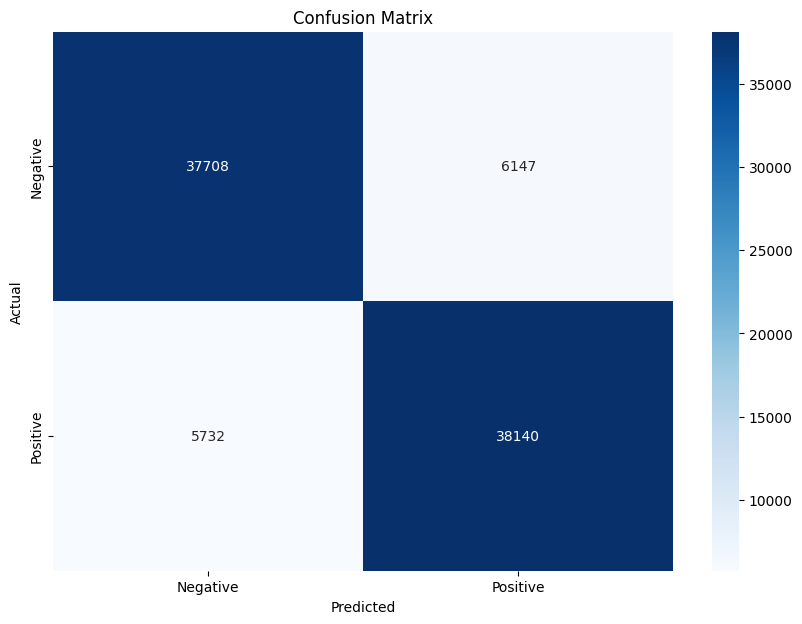

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid_b, y_valid_pred_gb_b)


# Vẽ confusion matrix dùng Seaborn cho bản đồ nhiệt dễ nhìn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Diện tích dưới đường cong (AUC): 0.9488766121982453


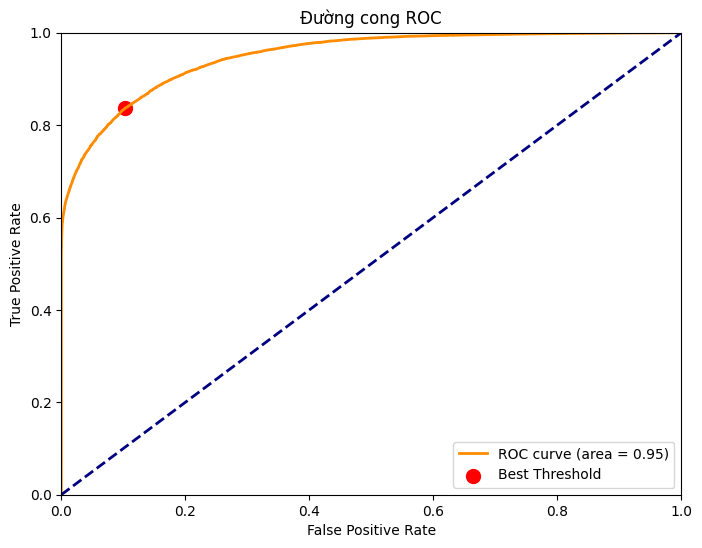

Threshold tốt nhất: 0.5660110565260484
True Positive Rate (TPR) tương ứng: 0.837436177972283
False Positive Rate (FPR) tương ứng: 0.10345456618401551


In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

# Chuyển đổi nhãn từ chuỗi sang số nguyên
y_valid_int = y_valid_b.astype(int)

# Dự đoán xác suất cho các lớp trên tập kiểm tra
y_valid_proba = my_gb_b.model.predict_proba(X_valid_b)[:, 1]

# Tính TPR, FPR và ngưỡng cho đường cong ROC
fpr, tpr, thresholds = roc_curve(y_valid_int, y_valid_proba)

# Tính AUC
auc = roc_auc_score(y_valid_int, y_valid_proba)
print("Diện tích dưới đường cong (AUC):", auc)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC')

# Tìm index của điểm tốt nhất
best_threshold_index = np.argmax(tpr - fpr)
best_threshold = thresholds[best_threshold_index]

# Chấm điểm tốt nhất trên đường cong ROC
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', s=100, label='Best Threshold')

plt.legend(loc="lower right")
plt.show()

print("Threshold tốt nhất:", best_threshold)
print("True Positive Rate (TPR) tương ứng:", tpr[best_threshold_index])
print("False Positive Rate (FPR) tương ứng:", fpr[best_threshold_index])

Độ chính xác trên tập validation: 0.8669850787100892
Đánh giá metrics với ngưỡng 0.5660110565260484:
Accuracy: 0.8669850787100892
Precision: 0.8900840661869807
Recall: 0.837436177972283
F1 score: 0.8629578738446723
Accuracy with best threshold 0.5660110565260484 : 0.8669850787100892
Confusion Matrix with best threshold 0.5660110565260484 :
[[39318  4537]
 [ 7132 36740]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     43855
           1       0.89      0.84      0.86     43872

    accuracy                           0.87     87727
   macro avg       0.87      0.87      0.87     87727
weighted avg       0.87      0.87      0.87     87727



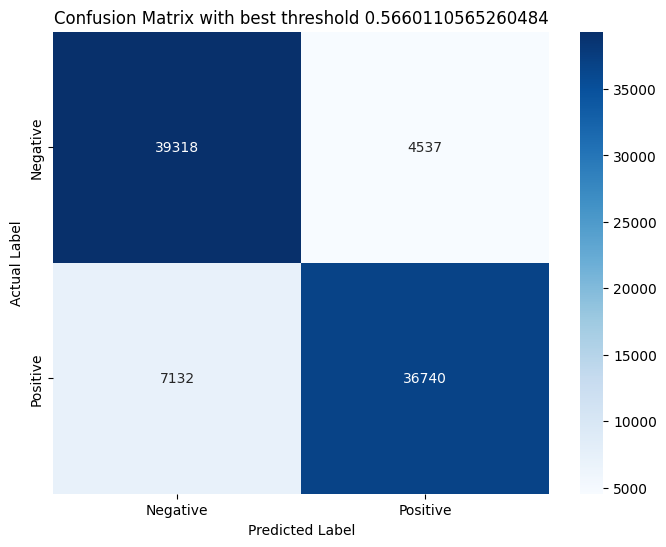

In [31]:
y_valid_pred_gb_b = my_gb_b.evaluate_model(best_threshold)

# Đánh giá mô hình với ngưỡng mới
cm = confusion_matrix(y_valid_int, y_valid_pred_gb_b)
accuracy = accuracy_score(y_valid_int, y_valid_pred_gb_b)
print("Accuracy with best threshold", best_threshold, ":", accuracy)
print("Confusion Matrix with best threshold", best_threshold, ":")
print(cm)
print(classification_report(y_valid_int, y_valid_pred_gb_b))

# Hiển thị confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix with best threshold " + str(best_threshold))
plt.show()

### Choose classification threshold

In [32]:
threshold_model = np.linspace(0.3,0.5,10)
threshold_model = np.append(threshold_model, best_threshold)
print("Thresholds after appending:", threshold_model)

y_valid_pred = []
for threshold in threshold_model:
    y_valid_pred_threshold = my_gb_b.evaluate_model(threshold)
    y_valid_pred.append(y_valid_pred_threshold)
    
    print("-------")
    
print(y_valid_pred)

Thresholds after appending: [0.3        0.32222222 0.34444444 0.36666667 0.38888889 0.41111111
 0.43333333 0.45555556 0.47777778 0.5        0.56601106]
Độ chính xác trên tập validation: 0.8287300375027072
Đánh giá metrics với ngưỡng 0.3:
Accuracy: 0.8287300375027072
Precision: 0.763447734205191
Recall: 0.9527261123267687
F1 score: 0.8476490808245708
-------
Độ chính xác trên tập validation: 0.8364243619410215
Đánh giá metrics với ngưỡng 0.3222222222222222:
Accuracy: 0.8364243619410215
Precision: 0.7760200456262388
Recall: 0.9459336250911743
F1 score: 0.8525937339496661
-------
Độ chính xác trên tập validation: 0.8436969234101246
Đánh giá metrics với ngưỡng 0.34444444444444444:
Accuracy: 0.8436969234101246
Precision: 0.7898216482164822
Recall: 0.9367250182348651
F1 score: 0.8570236903570236
-------
Độ chính xác trên tập validation: 0.8484845030606313
Đánh giá metrics với ngưỡng 0.36666666666666664:
Accuracy: 0.8484845030606313
Precision: 0.8005700805976017
Recall: 0.9282685995623632
F1 

In [33]:
models = [f'Model with {threshold:.2f}' for threshold in threshold_model]

metrics_threshold = calculate_metrics(y_valid_pred, y_valid_b)
comparision_Table(metrics_threshold, models)

+-----------------+----------+-----------+--------+----------+
|      Model      | Accuracy | Precision | Recall | F1 Score |
+-----------------+----------+-----------+--------+----------+
| Model with 0.30 |   0.83   |    0.76   |  0.95  |   0.85   |
| Model with 0.32 |   0.84   |    0.78   |  0.95  |   0.85   |
| Model with 0.34 |   0.84   |    0.79   |  0.94  |   0.86   |
| Model with 0.37 |   0.85   |    0.80   |  0.93  |   0.86   |
| Model with 0.39 |   0.85   |    0.81   |  0.92  |   0.86   |
| Model with 0.41 |   0.86   |    0.82   |  0.91  |   0.86   |
| Model with 0.43 |   0.86   |    0.83   |  0.90  |   0.86   |
| Model with 0.46 |   0.86   |    0.84   |  0.90  |   0.87   |
| Model with 0.48 |   0.86   |    0.85   |  0.89  |   0.87   |
| Model with 0.50 |   0.86   |    0.86   |  0.87  |   0.87   |
| Model with 0.57 |   0.87   |    0.89   |  0.84  |   0.86   |
+-----------------+----------+-----------+--------+----------+


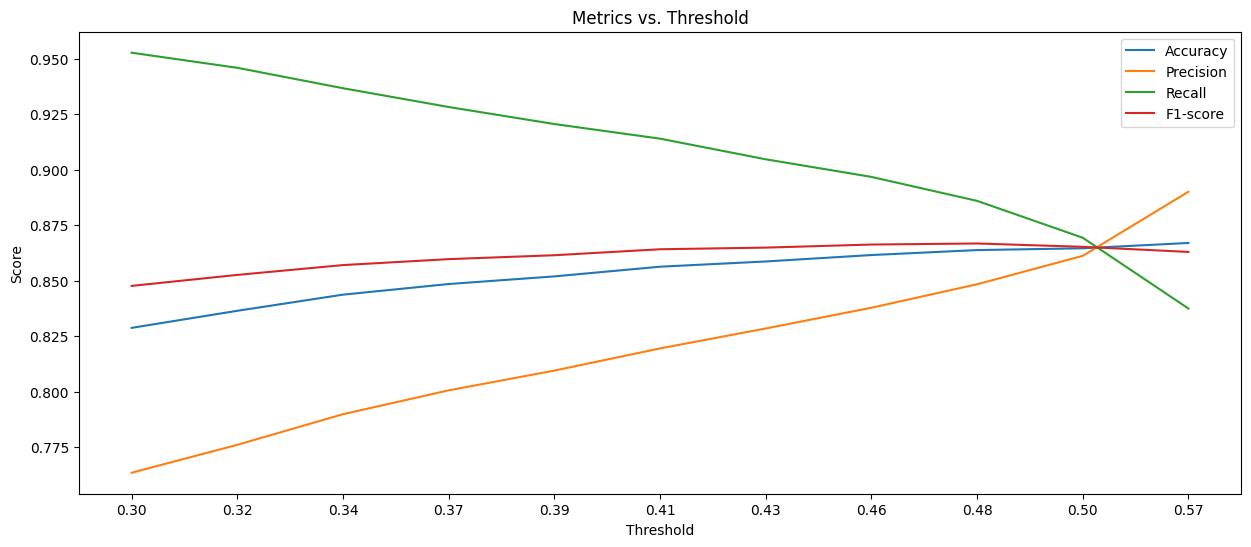

In [34]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
thresholds_rounded = ["%.2f" % threshold for threshold in threshold_model]

# Vẽ biểu đồ
plt.figure(figsize=(15, 6))

for i in range(len(metrics_threshold[0])):
    plt.plot(thresholds_rounded, [row[i] for row in metrics_threshold], label=labels[i])

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs. Threshold')
plt.xticks(thresholds_rounded)
plt.legend()
plt.grid(False)
plt.show()

In [35]:
threshold_choice = threshold_model[4]
print(f"Ngưỡng chọn: {threshold_choice:.2f}")

Ngưỡng chọn: 0.39



# Giải pháp đề ra
Ta có thể chọn ngưỡng ở vị trí tốt nhất trên đường cong ROC. Tuy nhiên khi phân tích, nhóm nhận thấy nếu ta có thể chọn ngưỡng sao cho TPR (Recall) cao mà vẫn giữ được tỉ lệ FPR ở mức tương đối ổn. Vì trong bài này nếu FPR ở mức khá cao cũng không ảnh hưởng quá lớn. Khi FPR cao, dự đoán mô hình sẽ sai với những người âm tính. Tuy nhiên nếu dự đoán sai cũng có thể năng cao ý thức bảo vệ sức khỏe của người dân. 

Mặc khác, ta có thể chọn ngưỡng thấp để có thể tránh điều đó. Giải pháp này cố tình gây nên tình trạng false positive(dương tính giả). 

Bảng trên cho thấy mô hình đều đánh giá rất hiệu quả ở mọi ngưỡng, kể cả ngưỡng tốt nhất trên đường cong ROC. 

Ngưỡng càng cao thì precision càng cao, recall càng thấp và ngược lại. Mô hình không thay đổi nhiều về tỉ lệ dự đoán đúng.

Mục đích của nhóm là nâng cao phần nào ý thức bảo vệ sức khỏe và giảm thiểu tình trạng âm tính giả. Để cân bằng cả hai tỉ lệ precision và recall, đặc biệt chú trọng recall. Nhóm quyết định lựa chọn ngưỡng là **0.39**
Tuy nhiên nếu có thể áp dụng mô hình này cùng với kinh nghiệm của các chuyên gia/bác sĩ. Có thể xem xét qua các tình trạng dương tính giả từ đó xác định được tình trạng bệnh nhân.

# Kiểm tra trên tập test và kết luận

In [36]:
model_final = ModelGradientBoosting(X_train_b, y_train_b, X_valid_b, y_valid_b, X_test_b, y_test_b)
model_final.train_model()

y_test_pred = model_final.evaluate_model(threshold_choice, True)

Độ chính xác trên tập test: 0.8524171577735474


#### Đánh giá trên tập test

In [37]:
accuracy = accuracy_score(y_test_b, y_test_pred)
precision = precision_score(y_test_b, y_test_pred)
recall = recall_score(y_test_b, y_test_pred)
f1 = f1_score(y_test_b, y_test_pred)

#metric_final = [accuracy, precision, recall, f1]
#print(metric_final)
model = [f"Mô hình Gradient Boosting với threshold={threshold_choice:.2f}"]


table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
table.add_row([model[0], "{:.2f}".format(accuracy), "{:.2f}".format(precision), "{:.2f}".format(recall), "{:.2f}".format(f1)])

print(table)

+----------------------------------------------+----------+-----------+--------+----------+
|                    Model                     | Accuracy | Precision | Recall | F1 Score |
+----------------------------------------------+----------+-----------+--------+----------+
| Mô hình Gradient Boosting với threshold=0.39 |   0.85   |    0.81   |  0.92  |   0.86   |
+----------------------------------------------+----------+-----------+--------+----------+


# Kết luận
Mô hình vẫn hiệu quả trên tập test
Bằng cách kết hợp phương pháp cân bằng dữ liệu và áp dụng cách chọn threshold. Mô hình xây dựng tương đối chính xác và có thể áp dụng thực tế. 
Trên tập test có thể thấy so với best threshold. Threshold nhóm chọn đã giảm được số lượng False Negative, tăng False Positive. 
Số lượng True Negative có giảm tuy nhiên vẫn ở mức ổn. Đạt được yêu cầu nhóm đề ra

Tuy nhiên để đảm báo mô hình vận hành một cách hiệu quả nên kết hợp với kiến thức chuyên môn của các y bác sĩ.

# Mở rộng bài nghiên cứu


## Phát triển chiến lược phòng ngừa và nâng cao ý thức của người bệnh:

#### Đề xuất các chiến lược và chương trình phòng ngừa bệnh tim dựa trên kết quả của mô hình dự đoán.

Mô hình cho thấy sự hiệu quả trên cả tập test và tập valid. Có thể áp dụng vào thực tế, mô hình cho thấy mối quan hệ rõ rệt giữa các yếu tố và nguy cơ mắc bệnh tim. Thông qua so sánh về tỉ lệ giữa nhóm người sức khỏe tốt và sức khỏe kém ở người nhỏ tuổi, có thể thấy nhóm người sức khỏe kém nguy cơ mắc bệnh tim cao hơn. 

**Chiến lược:**
Xem xét các biện pháp can thiệp và cải thiện lối sống để giảm thiểu nguy cơ mắc bệnh tim, dựa trên những hiểu biết từ nghiên cứu:
+ Thúc đẩy chế độ ăn uống lành mạnh, giảm BMI, cholesterol.
+ Khuyến khích vận động thể chất đều đặn, bao gồm tập thể dục và hoạt động vận động hàng ngày.
+ Ngừng hút thuốc lá và hạn chế tiêu thụ cồn.
+ Cần chủ động phòng ngừa các bệnh như đột quỵ, suy thận, ung thư da.
+ Khám sức khỏe định kỳ để phát hiện được nguy cơ sớm

**Chương trình phòng ngừa:**
+ Tổ chức các buổi hội thảo hoặc chiến dịch giáo dục cộng đồng để nâng cao nhận thức về bệnh tim và các biện pháp phòng ngừa.
+ Thiết lập hệ thống theo dõi và đánh giá hiệu quả của chương trình phòng ngừa, bao gồm việc theo dõi sự thay đổi trong chỉ số sức khỏe và số lượng người tham gia vào các hoạt động phòng ngừa.
+ Áp dụng mô hình dự đoán vào các chương trình có thể phát hiện sớm hoặc tăng ý thức đề phòng bệnh.


## Đề xuất hướng nghiên cứu tương lai:
Đề xuất các hướng nghiên cứu tiếp theo để cải thiện và mở rộng hiểu biết về bệnh tim, bao gồm cả việc sử dụng dữ liệu mới và phát triển các phương pháp phân tích tiên tiến hơn.

Rủi ro của mô hình là các thuộc tính dữ liệu là các bệnh khá nguy hiểm (suy thận, ung thư da, béo phì, hen suyễn). 
Cần thu thập nhiều dữ liệu mới để tổng quát hóa mô hình bao gồm các dữ liệu phức tạp hơn: ảnh chụp, hồ sơ điện tử, đồng hồ theo dõi sức khỏe. Đồng thời kết hợp các thuộc tính mới khác bao gồm cả yếu tố di truyền, môi trường, và lối sống...

Cần xem xét thêm nhiều mô hình học sâu, học tăng cường, cải thiện mạng nơ ron nhân tạo. Sử dụng các phương pháp phân tích đa biến để phân tích dữ liệu phức tạp và tìm ra mối liên hệ giữa nhiều yếu tố khác nhau đối với bệnh tim.